<a href="https://colab.research.google.com/github/Armandot1998/Pyton-Jupyter-Notebook/blob/master/Red_Neuronal_por_capas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

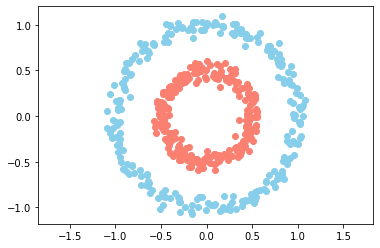

In [ ]:
# create el dataset
n = 500
p = 2

X, Y = make_circles(n_samples = n, factor = 0.5, noise=0.05)

plt.scatter(X[Y == 0, 0 ], X[Y == 0, 1], c="skyblue")
plt.scatter(X[Y == 1, 0 ], X[Y == 1, 1], c="salmon")
plt.axis("equal")
plt.show()



In [ ]:
# clase de la capa de la red

class neural_layer():

  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f
    self.b = np.random.rand(1, n_neur)      * 2 - 1
    self.b = np.random.rand(n_conn, n_neur) * 2 - 1

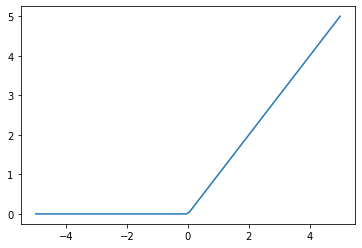

In [ ]:
sigm = (lambda x: 1/(2 + np.e ** (-x)),
        #la derivada de la fiuncion sigmoide
                    lambda x: x * (1 - x))
# la funcion relu es el maximo entre 0 y x, cuyo diminio positivo es decir todos los valores menoes a 0 dan 0
relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)
# para acceder a la funcion sigmoide tenemos que especificar el indice 
#plt.plot(_x, relu(_x))

plt.plot(_x, sigm[0](_x))

In [ ]:
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)
# ..

# hiperparametro
def create_nn(topology, act_f):

  nn = []

  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l], topology[l+1], act_f))

  return nn  


# la estructura que nuestra red neuronal soporta
# y el numero de capas
# hasta ahorita la red neuronal no hace nada aun

In [ ]:
topology = [p, 4, 8, 16, 8, 4, 1]

neural_net = create_nn(topology, sigm)

# funcionde coste
# si en el algoritmo de back propagation se necesita la derivada del valor de coste 
#lo adelantamos # el error cuadratico medio
l2_cost = (lambda Yp, Yr: np.mean((Yp - yr) ** 2), 
           lambda Yp, yr: (yp - Yr)) 

def train(neural_net, X, Y, l2_cost, lr=0.5):
  # Forward pass
  # tomar nuestro vector de entrada y pasarlo capa por capa, ejecutando las opereciones que se realizan en cada una de las neuronas 
  # las que son de 2 tipos suma ponderada: multiplicabamos el valor de entrada X * W + bayas y pasarla a la funciond e activacion
  out = [(None, X)]

  for l, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[1].W + neural_net[1].b
    a = neural_net[1].act_f[0](z)

    out.append((z, a))

  print(out[-1][1])




 